# BASELINE PIPELINE
> Dev log (format < Date > | <Author(s)> )  
> - Created: 28 July 2023 | JiHoon Kim <br>
> - Refactored:  8 Aug 2023 | Roshan Rane <br>
> - Updated:  15 Aug 2023 | JiHoon Kim <br>
> - Updated: 18 Sep 2023 | JiHoon Kim <br>

![toybrains_baseline_pipeline](https://github.com/RoshanRane/toybrains/assets/39021807/64ffd3d6-71ec-454b-ba14-bf4d603f2ac5)

## import libraries

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import sys, os

In [15]:
# add custom imports
from create_toybrains import ToyBrainsData
from utils.baseline import *

## check data generation config
Check the configurations set between Image generation attributes and covariates and labels before  generating the toybrains data

In [4]:
DATA_GEN_CONFIG='lbls-3bin_covs-3_17Jul23.py'

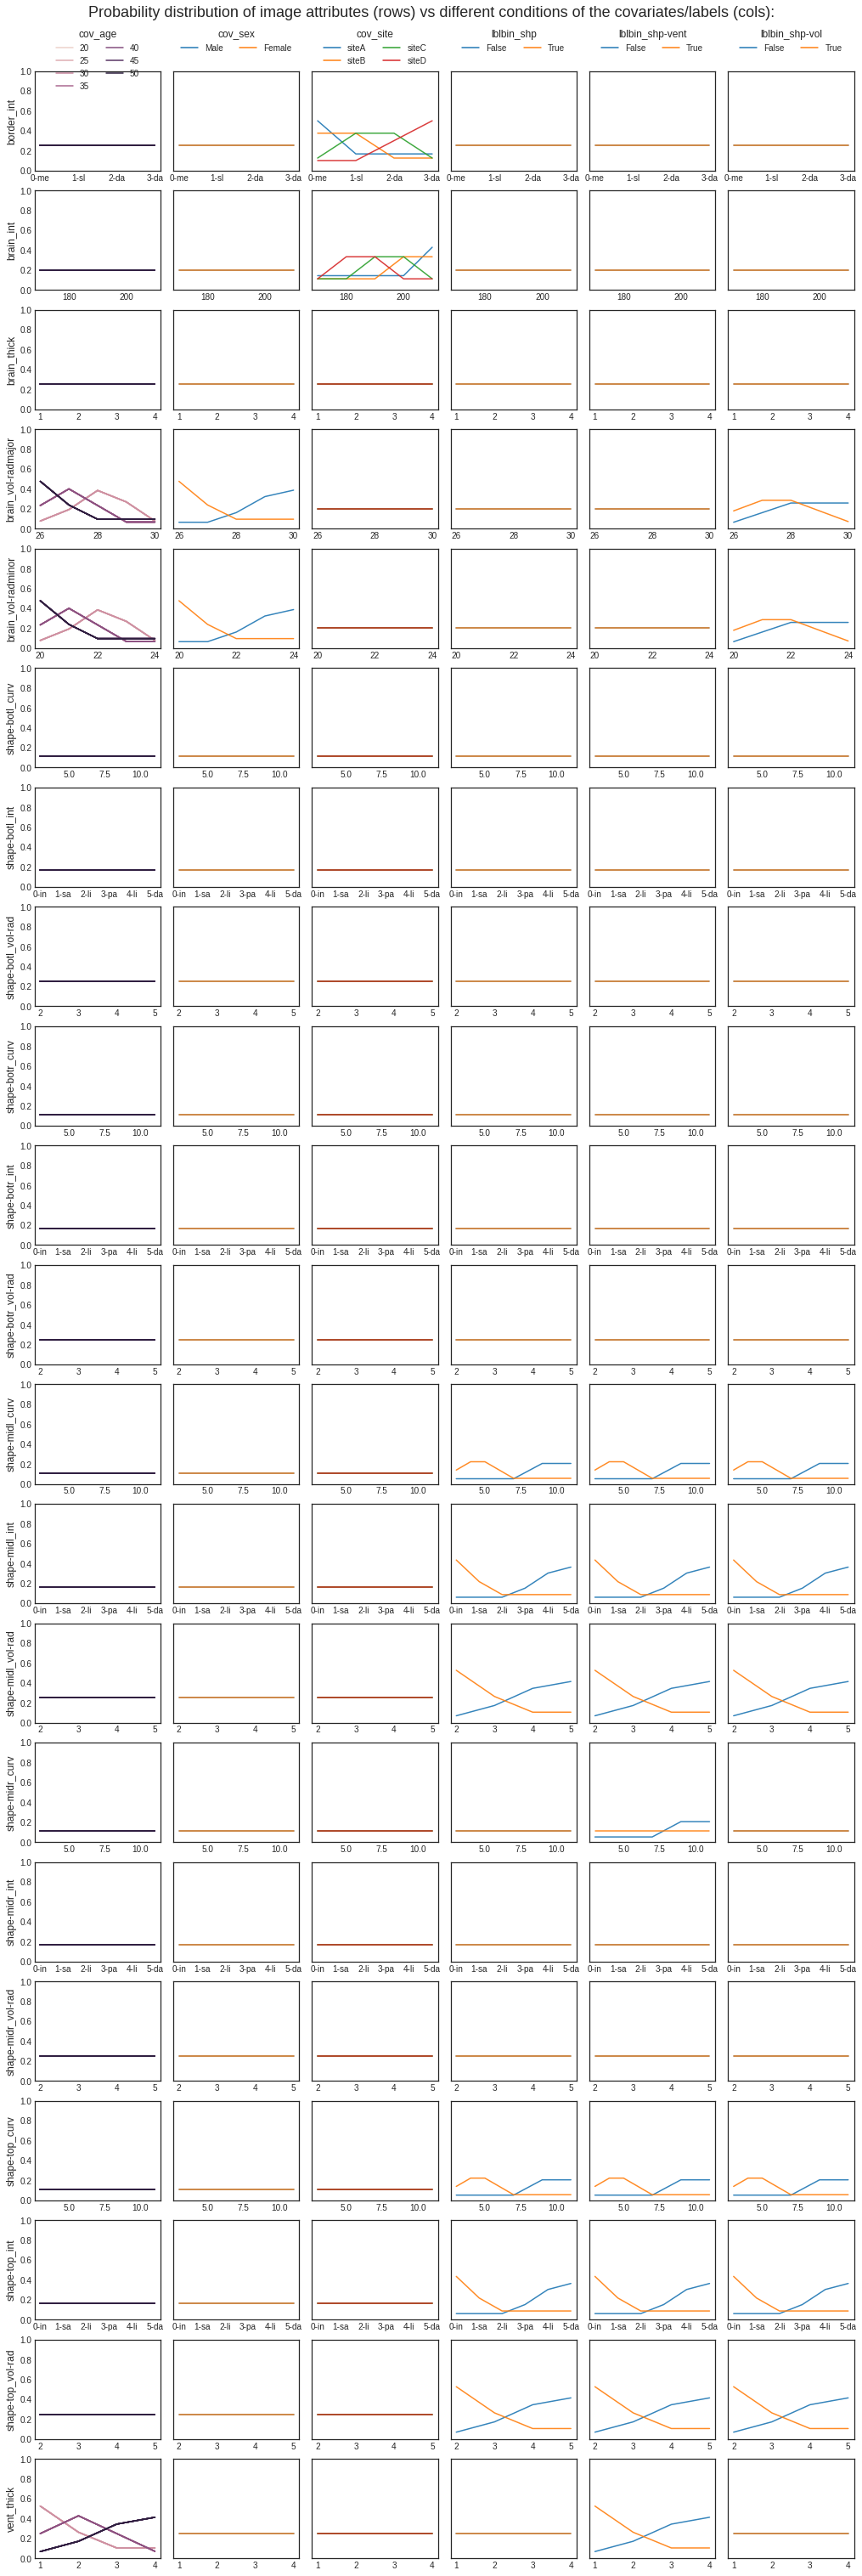

In [5]:
# check config file before generate toybrains it used shapes directory
ToyBrainsData(config=DATA_GEN_CONFIG).show_current_config()
# ToyBrainsData(config='demo').show_current_config()

## generate toybrains dataset
It can be extended as baseline config dict

In [6]:
data_dict = {
    'toybrains300_default': dict(
        n_samples=1000,
        config=None,
        img=False,
        debug=True,
    ),
    'toybrains300_17Jul23': dict(
        n_samples=1000,
        config=DATA_GEN_CONFIG,
        img=False,
        debug=True,
    ),
}

In [7]:
# RUN with generate toybrains
csv_path_list = generate_toybrains_list(data_dict, debug=False)

In [8]:
print(csv_path_list)

['dataset/toybrains300_default/toybrains_n1000.csv', 'dataset/toybrains300_17Jul23/toybrains_n1000.csv']


Or you can generate the dataset one by one

In [ ]:
# ! python create_toybrains.py -d --dir 'toybrains30k_17Jul23' -n 30000 -c $DATA_GEN_CONFIG

In [ ]:
# run_toybrains(n_samples=30000, data_dir='toybrains30k', config=DATA_GEN_CONFIG, debug=False)

## run baseline
You can run one by one. If you want you can generate new toybrains dataset using argument img=True

In [ ]:
# DATA_DIR="toybrains30k"
# OUT_DIR='results/toybrains30k'

In [ ]:
# out_path_list = run_baseline(DATA_DIR+"/toybrains_n30000.csv", 
#                              DATA_DIR=DATA_DIR, DATA_N=30000, OUT_DIR=OUT_DIR)

## run baseline pipeline
You can run baseline pipeline using data_dict. The pipeline returns the list of the ouput run.csv. If you already generate the dataset, then please switch img to False.

In [9]:
data_dict = {
    'toybrains30k_default': dict(
        n_samples=30000,
        config=None,
        img=False,
        debug=True,
    ),
    'toybrains30k_17Jul23': dict(
        n_samples=30000,
        config=DATA_GEN_CONFIG,
        img=False,
        debug=True,
    ),
}

In [10]:
out_path_list = run_baseline_pipeline(
    data_dict,
    CV=10,
    N_JOBS=10,
    random_seed=42,
    debug=False
)

###############################################################################################
Running Baseline on
DATA DIR: toybrains30k_default
N SAMPLES: 30000
OUTPUT DIR: /ritter/share/projects/JiHoon/toybrains/results/toybrains30k_default/20230918-1317
###############################################################################################
running a total of 180 different settings of [input features] x [output labels] x [cross validation]


100%|████████████████████████████████████████████████████████████████████████████████████████| 180/180 [01:15<00:00,  2.39it/s]


TOTAL RUNTIME: 0:01:18
###############################################################################################
Running Baseline on
DATA DIR: toybrains30k_17Jul23
N SAMPLES: 30000
OUTPUT DIR: /ritter/share/projects/JiHoon/toybrains/results/toybrains30k_17Jul23/20230918-1317
###############################################################################################
running a total of 180 different settings of [input features] x [output labels] x [cross validation]


100%|████████████████████████████████████████████████████████████████████████████████████████| 180/180 [01:04<00:00,  2.79it/s]


TOTAL RUNTIME: 0:01:07
TOTAL PIPELINE RUNTIME: 0:02:26


In [11]:
print(out_path_list)

['/ritter/share/projects/JiHoon/toybrains/results/toybrains30k_default/20230815-0248/run.csv', '/ritter/share/projects/JiHoon/toybrains/results/toybrains30k_17Jul23/20230815-0248/run.csv']


## Visualize results

In [ ]:
# TODO viz with cross validation

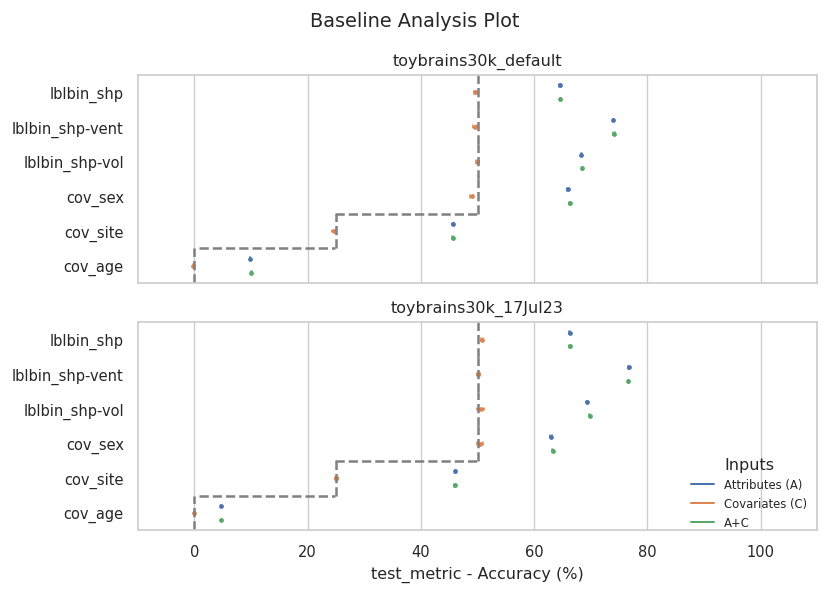

In [18]:
viz_df = viz_baseline(out_path_list)

In [19]:
summary(viz_df)

/ritter/share/projects/JiHoon/toybrains/utils/baseline.py:403: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  desc = pd.DataFrame(df.groupby(['out', 'inp', 'dataset'])['train_metric', 'val_metric', 'test_metric'].describe())


In [20]:
viz_df.groupby(["out", "inp", "dataset"])['train_metric', 'val_metric', 'test_metric'].mean()

/tmp/ipykernel_2997993/3412404614.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  viz_df.groupby(["out", "inp", "dataset"])['train_metric', 'val_metric', 'test_metric'].mean()


train_metric  val_metric  \
out             inp dataset                                          
cov_age         a   toybrains30k_17Jul23      0.050969    0.046959   
                    toybrains30k_default      0.105369    0.102147   
                a+c toybrains30k_17Jul23      0.051467    0.047271   
                    toybrains30k_default      0.106875    0.103414   
                c   toybrains30k_17Jul23      0.000191   -0.000231   
                    toybrains30k_default      0.000120   -0.000096   
cov_sex         a   toybrains30k_17Jul23      0.623083    0.621917   
                    toybrains30k_default      0.660028    0.657875   
                a+c toybrains30k_17Jul23      0.624722    0.621500   
                    toybrains30k_default      0.661245    0.659250   
                c   toybrains30k_17Jul23      0.505833    0.499750   
                    toybrains30k_default      0.507083    0.502417   
cov_site        a   toybrains30k_17Jul23      0.459181    0.457375   
                    toybrains30k_default      0.465565    0.460625   
                a+c toybrains30k_17Jul23      0.459037    0.456458   
                    toybrains30k_default      0.466106    0.461125   
                c   toybrains30k_17Jul23      0.256153    0.252125   
                    toybrains30k_default      0.255940    0.249167   
lblbin_shp      a   toybrains30k_17Jul23      0.659931    0.657792   
                    toybrains30k_default      0.652662    0.650750   
                a+c toybrains30k_17Jul23      0.659986    0.658375   
                    toybrains30k_default      0.653764    0.651125   
                c   toybrains30k_17Jul23      0.507444    0.505375   
                    toybrains30k_default      0.509102    0.504083   
lblbin_shp-vent a   toybrains30k_17Jul23      0.769111    0.767917   
                    toybrains30k_default      0.737222    0.736292   
                a+c toybrains30k_17Jul23      0.770588    0.768875   
                    toybrains30k_default      0.737662    0.735625   
                c   toybrains30k_17Jul23      0.503977    0.494042   
                    toybrains30k_default      0.508171    0.502958   
lblbin_shp-vol  a   toybrains30k_17Jul23      0.694662    0.692833   
                    toybrains30k_default      0.686917    0.685417   
                a+c toybrains30k_17Jul23      0.696991    0.694958   
                    toybrains30k_default      0.691088    0.689833   
                c   toybrains30k_17Jul23      0.503491    0.494250   
                    toybrains30k_default      0.505931    0.495542   

                                          test_metric  
out             inp dataset                            
cov_age         a   toybrains30k_17Jul23     0.047764  
                    toybrains30k_default     0.097970  
                a+c toybrains30k_17Jul23     0.048097  
                    toybrains30k_default     0.100944  
                c   toybrains30k_17Jul23    -0.000871  
                    toybrains30k_default    -0.001474  
cov_sex         a   toybrains30k_17Jul23     0.630150  
                    toybrains30k_default     0.659083  
                a+c toybrains30k_17Jul23     0.632767  
                    toybrains30k_default     0.662667  
                c   toybrains30k_17Jul23     0.504467  
                    toybrains30k_default     0.489683  
cov_site        a   toybrains30k_17Jul23     0.460850  
                    toybrains30k_default     0.457017  
                a+c toybrains30k_17Jul23     0.459800  
                    toybrains30k_default     0.457067  
                c   toybrains30k_17Jul23     0.250567  
                    toybrains30k_default     0.246933  
lblbin_shp      a   toybrains30k_17Jul23     0.662600  
                    toybrains30k_default     0.645600  
                a+c toybrains30k_17Jul23     0.663250  
                    toybrains30k_default     0.646067  
                c   toybrains30k_17Ju